In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as nc4

In [2]:
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

In [3]:
pdt = "GEBCO_07_Nov_2022_6d0717d7a001/gebco_2022_n2.0_s-2.0_w-24.0_e-14.0.nc"

dt = nc4.Dataset(pdt)
gdep = dt.variables['elevation'][:,:]
lon = dt.variables['lon'][:] ; lat = dt.variables['lat'][:]
dt.close()

In [4]:
nX = np.shape(lon)[0] ; nY = np.shape(lat)[0]
glam =  np.repeat(lon[np.newaxis,:], nY, axis=0) ; gphi =  np.repeat(lat[:,np.newaxis], nX, axis=1)

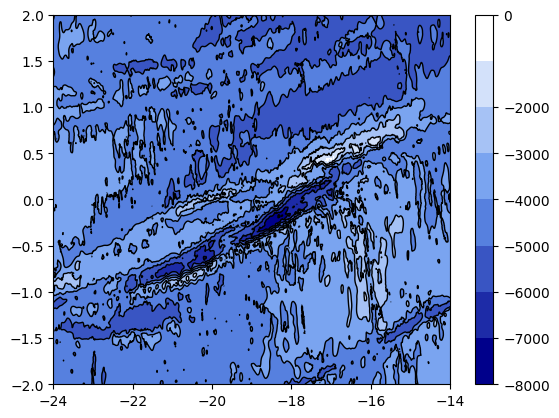

In [302]:
%matplotlib inline

blevels = [-8000, -7000, -6000, -5000, -4000, -3000, -2000, 0]
N = len(blevels)
cmap2 = custom_div_cmap(N, mincol='DarkBlue', midcol='CornflowerBlue' ,maxcol='w')
cmap2.set_over('0.7') # set positive values (land) as light gray

plt.figure()
plt.pcolormesh(glam,gphi,gdep,\
               vmin=-8000, vmax=0, \
               cmap=cmap2)
plt.colorbar( ticks=blevels, spacing='proportional')
plt.contour(glam,gphi,gdep, levels=blevels, negative_linestyles = 'solid', colors='k', linewidths = 1.)
plt.show()

In [6]:
## shapiro filtering
#Ns = 100
#
#gdep_s = np.copy(gdep)
#tmp = np.copy(gdep)
#for _ in range(Ns):
#    for j in range(1,nY-1):
#        tmp[j,:] = 0.25*gdep_s[j-1,:] + 0.5*gdep_s[j,:] + 0.25*gdep_s[j+1,:]
#    gdep_s = tmp
#    for i in range(1,nX-1):
#        tmp[:,i] = 0.25*gdep_s[:,i-1] + 0.5*gdep_s[:,i] + 0.25*gdep_s[:,i+1]
#    gdep_s = tmp
#
#    
#plt.figure()
#plt.pcolormesh(glam,gphi,gdep_s,\
#               vmin=-8000, vmax=0, \
#               cmap=cmap2)
#plt.colorbar(ticks=blevels, spacing='proportional')
#plt.contour(glam,gphi,gdep_s, levels=blevels, negative_linestyles = 'solid', colors='k', linewidths = 1.)
#plt.show()

<IPython.core.display.Javascript object>


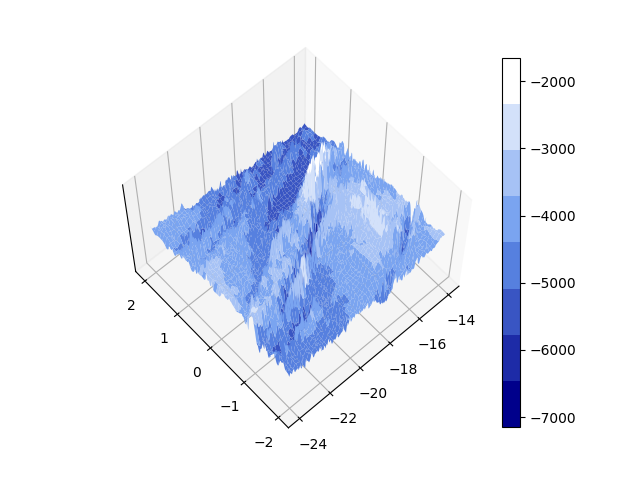

In [357]:
#matplotlib inline
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(glam, gphi, gdep, cmap=cmap2,
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.set_zticks([])
ax.patch.set_color('1.')
# Add a color bar which maps values to colors.
fig.colorbar(surf, ticks=blevels, spacing='proportional')

In [429]:
# meaning

n_grid = 16
nX0 = nX//n_grid ; nY0 = nY//n_grid
glam0 = np.zeros((nY0,nX0))
gphi0 = np.zeros((nY0,nX0))
gdep0 = np.zeros((nY0,nX0))

for i0 in range(nX0):
    for j0 in range(nY0):
        #
        for _i in range(n_grid):
            for _j in range(n_grid):
                i = i0*n_grid + _i ; j = j0*n_grid + _j
                glam0[j0,i0] += glam[j,i]/(n_grid*n_grid)
                gphi0[j0,i0] += gphi[j,i]/(n_grid*n_grid)
                gdep0[j0,i0] += gdep[j,i]/(n_grid*n_grid)
print(np.shape(glam0))


(60, 150)


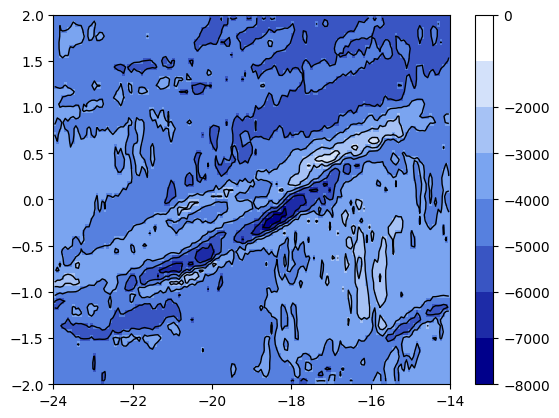

In [424]:
%matplotlib inline

blevels = [-8000, -7000, -6000, -5000, -4000, -3000, -2000, 0]
N = len(blevels)
cmap2 = custom_div_cmap(N, mincol='DarkBlue', midcol='CornflowerBlue' ,maxcol='w')
cmap2.set_over('0.7') # set positive values (land) as light gray

plt.figure()
plt.pcolormesh(glam0,gphi0,gdep0,\
               vmin=-8000, vmax=0, \
               cmap=cmap2)
plt.colorbar( ticks=blevels, spacing='proportional')
plt.contour(glam0,gphi0,gdep0, levels=blevels, negative_linestyles = 'solid', colors='k', linewidths = 1.)
plt.show()

<IPython.core.display.Javascript object>


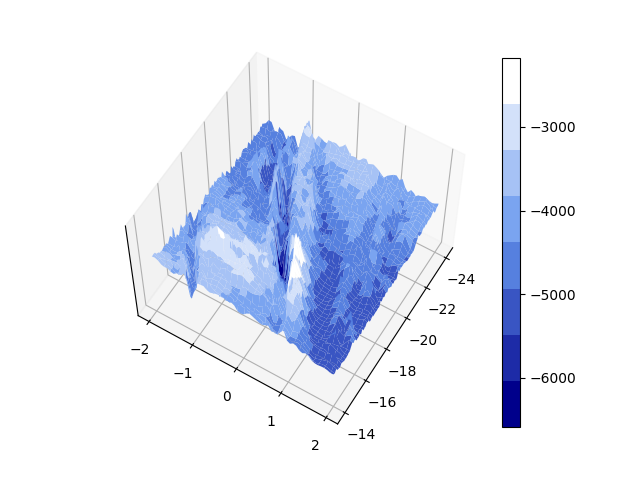

In [425]:
#%matplotlib inline
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(glam0, gphi0, gdep0, cmap=cmap2,
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.set_zticks([])
ax.patch.set_color('1.')
# Add a color bar which maps values to colors.
fig.colorbar(surf, ticks=blevels, spacing='proportional')

# Algorithme $A^*$
>https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2

In [432]:
print(np.shape(glam0))

(60, 150)


-7585.51171875
(60, 150)
size of the maze (X,Y) 60 x 150
start (0, 0)
end (0, 0)


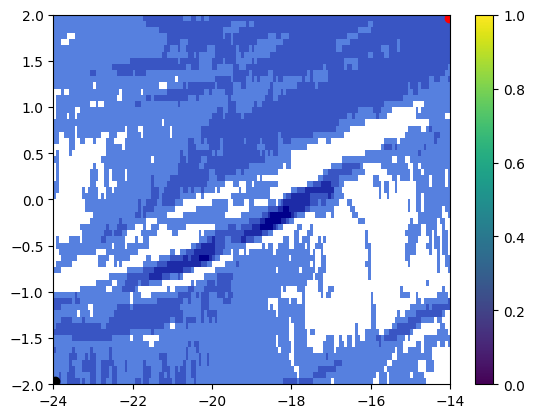

In [458]:
maze = np.copy(gdep0)
print(np.min(gdep0))
maze = -(maze - np.min(gdep0))/np.min(gdep0)
maze[maze>0.5] = np.inf

Nx, Ny = np.shape(maze)
print(np.shape(glam0))
print("size of the maze (X,Y) %d x %d" % (Nx,Ny))
dx0 = glam0[0,1] - glam0[0,0] ; dy0 = gphi0[1,0] - gphi0[0,0]
start = (np.argmin(gphi0[0,:]), np.argmin(glam0[:,0])) # j,i
end   = (np.argmax(gphi0[0,:]), np.argmax(glam0[:,0])) # j,i
print("start",start)
print("end",end)
end = (59,149)

%matplotlib inline
plt.figure()
plt.pcolormesh(glam0,gphi0,maze,\
               vmin=0, vmax=1, \
               cmap=cmap2)
plt.scatter(glam0[0,start[1]],gphi0[start[0],0],c='k')
plt.scatter(glam0[0,  end[1]],gphi0[  end[0],0],c='r')
plt.colorbar(spacing='proportional')
plt.show()



In [443]:
def h(n,m=end):       # heurisitic distance
    #r = 0.            # case h = 0 -> Dijkstra
    r = np.sqrt((n[0]-m[0])**2 + (n[1]-m[1])**2)
    return(r)

def dist(c,n):
    r = np.max([np.abs(c[1]-n[1]), np.abs(c[0] - n[0]) ] )    # norm taxis
    return(r)

def in_map(node,maze):
    if (node[0] < 0 or node[0] >= Nx or \
        node[1] < 0 or node[1] >= Ny):
        return(False)
    else:
        return(True)

def add_tuple(a,b):
    return((a[0]+b[0], a[1]+b[1]))
    
#neighbors = np.arr 

In [444]:
error_flag = 0

class SetNode():
    
    def __init__(self):
        self.N     = 0
        self.listnode = []
        self.listnode_parent = []
    
    def add_node( self,node,parent= (-1,-1) ):
        self.N +=1
        self.listnode.append(node)
        self.listnode_parent.append(parent)

    def get_node(self,i):
        return( (self.listnode[i], self.listnode_parent[i]) )
    
    def change_parent(self,node,parent):
        for i,x in enumerate(self.listnode):
            if x == node:
                self.listnode_parent[i]=parent
    
    def get_father(self,node):
        for i,x in enumerate(self.listnode):
            if x == node:
                return(self.listnode_parent[i])
              
    def pop_node(self,i):
        if self.N == 0:
            error_flag = 1
            print("Set is empty, cannot pop a node (1)")
        else :
            self.N -= 1
            self.listnode.pop(i)
            self.listnode_parent.pop(i)
    
    def in_set(self, x):
        for node in self.listnode:
            if (x == node):
                return(True)
            else :
                return(False)
            
    def tree(self):   # build path from the last added
        node, parent = self.get_node(-1) 
        flag = 1 ; path=[node]
        while flag :
            parent = self.get_father(parent)
            if parent==(-1,-1): 
                break
            path = [parent] + path
        return(path)


In [452]:
""" Initialisation """
# Start - visited but not expanded (succesors not explored yet) like a pending task, still possibilies
openSet = SetNode()
openSet.add_node(start)
# Close - visited and expanded
closSet = SetNode()
# comeFrom[n] is the preceding node coming from the cheapest path
comeSet = SetNode()

# gScore[n] is the cost from the start to n of the cheapest path
# map with inf for blocking walls
gmap = np.inf * np.ones(np.shape(maze))
gmap[start] = 0.

# fScore[n] = gScore[n] + h is the current best guess if it goes through n
fmap = np.inf * np.ones(np.shape(maze))
fmap[start] = h(start)

pathway = []
""" Run """
print("... start")
counter = 0
while openSet.N >0 :
    # error test
    if error_flag != 0: break 
    counter +=1
    if counter%100 ==0 : print("counter : %d" % (counter))
        
    # switch to the node actually having the lowest score within the openSet (possibilities)
    f=[]
    for node in openSet.listnode :
        f+=[fmap[node]]
    current_i      = np.argmin(f)
    current,parent = openSet.get_node(current_i) 
    
    # current is explored : remove from openSet and add it to the closSet
    openSet.pop_node(current_i)
    closSet.add_node(current,parent)
        
    if current == end :   # end is reached !
        pathway = closSet.tree()
        print("counter : %d" % (counter))
        print(pathway)
        break
    #
    # build neighbors : adjacent nodes to the current (away from closed ones and borders)
    neighbors = []  #  -     /     |      \      -     /       |     \
    for adjacent in [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]:
        
        ij = add_tuple(current,adjacent)
        
        
        if not in_map(ij,maze) : continue   # si hors champs, passe
        
        if maze[ij]==np.inf : continue              # blocking wall
        #print("ij=",ij)  
        if not closSet.in_set(ij) :         # puis, si dans closedset
            neighbors.append(ij)

    #print(fmap)
    #print(current)
    #print("neighbors",neighbors)
    #print("openSet",openSet.listnode)
    
    for nye in neighbors:
        
        t_gscore = gmap[current] + dist(current,nye) # estimate score to adjacent node and udate g, h , f
        
        if openSet.in_set(nye):    # if voisin est déjà dans openlist, passage par current moins cher, update
            if t_gscore<gmap[nye]:
                gmap[nye] = t_gscore         
                fmap[nye] = t_gscore + h(nye)
                openSet.change_parent(nye,current)
            else : 
                continue 
        else :                     # if not, add nye to the openlist
            openSet.add_node(nye,current)                  # accessed from current
            gmap[nye] = t_gscore                           # (important) update distance from start going through current
            fmap[nye] = t_gscore + h(nye)

... start
counter : 100
counter : 200
counter : 254
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (16, 17), (16, 18), (16, 19), (16, 20), (17, 21), (17, 22), (17, 23), (17, 24), (17, 25), (17, 26), (17, 27), (18, 28), (18, 29), (18, 30), (18, 31), (18, 32), (18, 33), (19, 34), (20, 35), (20, 36), (19, 37), (19, 38), (19, 39), (20, 40), (20, 41), (20, 42), (20, 43), (21, 44), (21, 45), (20, 46), (20, 47), (21, 48), (21, 49), (21, 50), (21, 51), (22, 52), (22, 53), (22, 54), (23, 55), (23, 56), (24, 57), (24, 58), (24, 59), (24, 60), (25, 61), (26, 62), (27, 63), (26, 64), (26, 65), (26, 66), (26, 67), (26, 68), (26, 69), (26, 70), (27, 71), (27, 72), (27, 73), (28, 74), (29, 75), (30, 76), (31, 77), (32, 78), (33, 78), (34, 79), (35, 80), (36, 81), (37, 82), (38, 83), (39, 84), (40, 85), (41, 86), (42, 87), (43, 88), (44, 89), (45, 90), (46, 91), (47, 92), (48, 93), (49, 94), (50, 95

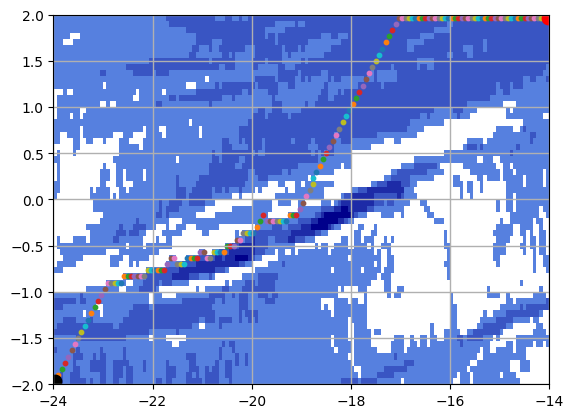

In [464]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(glam0,gphi0,maze,\
               vmin=0, vmax=1, \
               cmap=cmap2)
for obj in pathway:
    ax.scatter(glam0[0,obj[1]],gphi0[obj[0],0],s=10)
ax.scatter(glam0[0,start[1]],gphi0[start[0],0],c='k',s=80)
ax.scatter(glam0[0,  end[1]],gphi0[  end[0],0],c='r',s=80)
ax.grid(True,lw=1)
#plt.colorbar(spacing='proportional')
plt.show()